In [1]:
include("Script/MomentumFunctions.jl")

factor_weight (generic function with 4 methods)

In [2]:
using Quandl
auth_default = "VhLmhL-NbYjbUmBSyDA6"

"VhLmhL-NbYjbUmBSyDA6"

In [3]:
println("Getting quandl data.")
# get vix, vxv data from quandl
vixf,vxvf = map(x->quandlget(x,from = "01/01/2001",api_key=auth_default), ["CBOE/VIX","CBOE/VXV"])
vix = vixf["VIX Close"]
vxv = vxvf["CLOSE"]

ttn = vix.timestamp

Getting quandl data.


3554-element Array{Date,1}:
 2004-01-02
 2004-01-05
 2004-01-06
 2004-01-07
 2004-01-08
 2004-01-09
 2004-01-12
 2004-01-13
 2004-01-14
 2004-01-15
 2004-01-16
 2004-01-20
 2004-01-21
 ⋮         
 2018-01-29
 2018-01-30
 2018-01-31
 2018-02-01
 2018-02-02
 2018-02-05
 2018-02-06
 2018-02-07
 2018-02-08
 2018-02-09
 2018-02-12
 2018-02-13

In [4]:
vix_table = DataFrame()
vix_table[:Date] = ttn
vix_table[:VIX] = vix["VIX Close"].values
vix_med5 = [0.0,0.0,0.0,0.0]
for i=5:length(ttn)
    push!(vix_med5, median(vix_table[:VIX][i-4:i]))
end
vix_table[:Med5] = vix_med5 
vix_ret5 = [0.0,0.0,0.0,0.0,0.0]
for i=6:length(ttn)
    push!(vix_ret5, vix_table[:VIX][i] / vix_table[:VIX][i-5])
end
vix_table[:RET5] = vix_ret5
vix_table

3554×4 DataFrames.DataFrame
│ Row  │ Date       │ VIX   │ Med5  │ RET5     │
├──────┼────────────┼───────┼───────┼──────────┤
│ 1    │ 2004-01-02 │ 18.22 │ 0.0   │ 0.0      │
│ 2    │ 2004-01-05 │ 17.49 │ 0.0   │ 0.0      │
│ 3    │ 2004-01-06 │ 16.73 │ 0.0   │ 0.0      │
│ 4    │ 2004-01-07 │ 15.5  │ 0.0   │ 0.0      │
│ 5    │ 2004-01-08 │ 15.61 │ 16.73 │ 0.0      │
│ 6    │ 2004-01-09 │ 16.75 │ 16.73 │ 0.919319 │
│ 7    │ 2004-01-12 │ 16.82 │ 16.73 │ 0.961692 │
│ 8    │ 2004-01-13 │ 18.04 │ 16.75 │ 1.0783   │
│ 9    │ 2004-01-14 │ 16.75 │ 16.75 │ 1.08065  │
│ 10   │ 2004-01-15 │ 15.56 │ 16.75 │ 0.996797 │
│ 11   │ 2004-01-16 │ 15.0  │ 16.75 │ 0.895522 │
⋮
│ 3543 │ 2018-01-29 │ 13.84 │ 11.47 │ 1.25476  │
│ 3544 │ 2018-01-30 │ 14.79 │ 11.58 │ 1.33243  │
│ 3545 │ 2018-01-31 │ 13.54 │ 13.54 │ 1.18047  │
│ 3546 │ 2018-02-01 │ 13.47 │ 13.54 │ 1.16321  │
│ 3547 │ 2018-02-02 │ 17.31 │ 13.84 │ 1.56227  │
│ 3548 │ 2018-02-05 │ 37.32 │ 14.79 │ 2.69653  │
│ 3549 │ 2018-02-06 │ 29.98 │ 17.31 │ 2.02705  │
│ 3550 │ 2018-02-07 │ 27.73 │ 27.73 │ 2.04801  │
│ 3551 │ 2018-02-08 │ 33.46 │ 29.98 │ 2.48404  │
│ 3552 │ 2018-02-09 │ 29.06 │ 29.98 │ 1.6788   │
│ 3553 │ 2018-02-12 │ 25.61 │ 29.06 │ 0.686227 │
│ 3554 │ 2018-02-13 │ 24.97 │ 27.73 │ 0.832889 │

In [5]:
raw_log = readtable("data/Log_Adjusted_Close_2018-01-30.csv")
log_df = DataFrame()
log_df[:Date] = map(Dates.Date, raw_log[:Date])
for x in names(raw_log)[2:end]
    log_df[x] = raw_log[x]
end
log_df

4548×419 DataFrames.DataFrame
│ Row  │ Date       │ AA      │ AABA    │ AAL     │ AAOI    │ AAPL    │
├──────┼────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1    │ 2000-01-03 │ NA      │ 4.77702 │ NA      │ NA      │ 1.27634 │
│ 2    │ 2000-01-04 │ NA      │ 4.70728 │ NA      │ NA      │ 1.18824 │
│ 3    │ 2000-01-05 │ NA      │ 4.65467 │ NA      │ NA      │ 1.20279 │
│ 4    │ 2000-01-06 │ NA      │ 4.52233 │ NA      │ NA      │ 1.11225 │
│ 5    │ 2000-01-07 │ NA      │ 4.62326 │ NA      │ NA      │ 1.15855 │
│ 6    │ 2000-01-10 │ NA      │ 4.69158 │ NA      │ NA      │ 1.14081 │
│ 7    │ 2000-01-11 │ NA      │ 4.59865 │ NA      │ NA      │ 1.08829 │
│ 8    │ 2000-01-12 │ NA      │ 4.49312 │ NA      │ NA      │ 1.02647 │
│ 9    │ 2000-01-13 │ NA      │ 4.46274 │ NA      │ NA      │ 1.13053 │
│ 10   │ 2000-01-14 │ NA      │ 4.48017 │ NA      │ NA      │ 1.16795 │
│ 11   │ 2000-01-18 │ NA      │ 4.44617 │ NA      │ NA      │ 1.20219 │
⋮
│ 4537 │ 2018-01-12 │ 4.03883 │ 4.32876 │ 4.06851 │ 3.57934 │ 5.17666 │
│ 4538 │ 2018-01-16 │ 4.02963 │ 4.30298 │ 4.0601  │ 3.53135 │ 5.17156 │
│ 4539 │ 2018-01-17 │ 4.04288 │ 4.30596 │ 4.0632  │ 3.52636 │ 5.18794 │
│ 4540 │ 2018-01-18 │ 3.97029 │ 4.30717 │ 4.06629 │ 3.49012 │ 5.18884 │
│ 4541 │ 2018-01-19 │ 3.97218 │ 4.30892 │ 4.06148 │ 3.5562  │ 5.18436 │
│ 4542 │ 2018-01-22 │ 3.96916 │ 4.30622 │ 4.06217 │ 3.54096 │ 5.17615 │
│ 4543 │ 2018-01-23 │ 3.96062 │ 4.33821 │ 4.06543 │ 3.55792 │ 5.17638 │
│ 4544 │ 2018-01-24 │ 3.97594 │ 4.35427 │ 4.00351 │ 3.53281 │ 5.16032 │
│ 4545 │ 2018-01-25 │ 3.97237 │ 4.36412 │ 3.97123 │ 3.5582  │ 5.14231 │
│ 4546 │ 2018-01-26 │ 3.98898 │ 4.38577 │ 3.97161 │ 3.58324 │ 5.14464 │
│ 4547 │ 2018-01-29 │ 3.99802 │ 4.37374 │ 3.96424 │ 3.50646 │ 5.12373 │
│ 4548 │ 2018-01-30 │ 3.96119 │ 4.36016 │ 3.96253 │ 3.49165 │ 5.11781 │

│ Row  │ ABBV    │ ABC     │ ABT     │ ABX     │ ACAD    │ ACN     │ ADBE    │
├──────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1    │ NA      │ 1.17949 │ 2.25536 │ 2.66614 │ NA      │ NA      │ 2.78979 │
│ 2    │ NA      │ 1.10893 │ 2.22637 │ 2.6519  │ NA      │ NA      │ 2.70217 │
│ 3    │ NA      │ 1.18332 │ 2.22077 │ 2.67682 │ NA      │ NA      │ 2.71983 │
│ 4    │ NA      │ 1.25675 │ 2.25907 │ 2.66952 │ NA      │ NA      │ 2.72992 │
│ 5    │ NA      │ 1.37922 │ 2.26955 │ 2.64442 │ NA      │ NA      │ 2.77736 │
│ 6    │ NA      │ 1.40519 │ 2.26248 │ 2.64442 │ NA      │ NA      │ 2.81524 │
│ 7    │ NA      │ 1.43649 │ 2.24819 │ 2.66274 │ NA      │ NA      │ 2.74407 │
│ 8    │ NA      │ 1.43649 │ 2.23038 │ 2.64442 │ NA      │ NA      │ 2.73895 │
│ 9    │ NA      │ 1.59983 │ 2.22123 │ 2.63746 │ NA      │ NA      │ 2.79086 │
│ 10   │ NA      │ 1.53441 │ 2.24321 │ 2.62282 │ NA      │ NA      │ 2.80116 │
│ 11   │ NA      │ 1.49113 │ 2.22123 │ 2.65876 │ NA      │ NA      │ 2.76571 │
⋮
│ 4537 │ 4.60856 │ 4.59512 │ 4.07482 │ 2.71602 │ 3.34533 │ 5.07586 │ 5.27326 │
│ 4538 │ 4.62977 │ 4.60066 │ 4.068   │ 2.7213  │ 3.33755 │ 5.06234 │ 5.25989 │
│ 4539 │ 4.64785 │ 4.61809 │ 4.07737 │ 2.68239 │ 3.34109 │ 5.07649 │ 5.28061 │
│ 4540 │ 4.64256 │ 4.61373 │ 4.07872 │ 2.65886 │ 3.32432 │ 5.08103 │ 5.27913 │
│ 4541 │ 4.65053 │ 4.60577 │ 4.08278 │ 2.66514 │ 3.29287 │ 5.08605 │ 5.27674 │
│ 4542 │ 4.66805 │ 4.63142 │ 4.08715 │ 2.67484 │ 3.36488 │ 5.08407 │ 5.28746 │
│ 4543 │ 4.65757 │ 4.63288 │ 4.08143 │ 2.69665 │ 3.41181 │ 5.08066 │ 5.29877 │
│ 4544 │ 4.65881 │ 4.65033 │ 4.12261 │ 2.71138 │ 3.42002 │ 5.07892 │ 5.28716 │
│ 4545 │ 4.68491 │ 4.64794 │ 4.14662 │ 2.69463 │ 3.42361 │ 5.0801  │ 5.28579 │
│ 4546 │ 4.81389 │ 4.65852 │ 4.14978 │ 2.69124 │ 3.46979 │ 5.09099 │ 5.3048  │
│ 4547 │ 4.80656 │ 4.65482 │ 4.14804 │ 2.66375 │ 3.45758 │ 5.08258 │ 5.28943 │
│ 4548 │ 4.75256 │ 4.62947 │ 4.13421 │ 2.66096 │ 3.42263 │ 5.0733  │ 5.2827  │

│ Row  │ ADM     │ ADP     │ ADSK    │ AEO     │ AET     │ AFL     │ AG      │
├──────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1    │ 2.08069 │ 3.33936 │ 2.

In [6]:
#=
mom_table_regress_30 = df_mom_regress(log_df, 30)
mom_table_regress_60 = df_mom_regress(log_df, 60)
mom_table_regress_90 = df_mom_regress(log_df, 90)
writetable("backtest/30day_mom_regress.csv", mom_table_regress_30)
writetable("backtest/60day_mom_regress.csv", mom_table_regress_60)
writetable("backtest/90day_mom_regress.csv", mom_table_regress_90)
=#

In [7]:
#mom_table_regress_30 = readtable("backtest/30day_mom_regress.csv")
#mom_table_regress_60 = readtable("backtest/60day_mom_regress.csv")
mom_table_regress_90 = readtable("backtest/TIIGO_90day_mom_regress.csv")

4462×426 DataFrames.DataFrame
│ Row  │ Date         │ AA          │ AABA        │ AAL         │ AAOI        │
├──────┼──────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ 1    │ "2000-05-10" │ NA          │ -0.00277095 │ NA          │ NA          │
│ 2    │ "2000-05-11" │ NA          │ -0.00268858 │ NA          │ NA          │
│ 3    │ "2000-05-12" │ NA          │ -0.00262919 │ NA          │ NA          │
│ 4    │ "2000-05-15" │ NA          │ -0.00256679 │ NA          │ NA          │
│ 5    │ "2000-05-16" │ NA          │ -0.00256107 │ NA          │ NA          │
│ 6    │ "2000-05-17" │ NA          │ -0.00245671 │ NA          │ NA          │
│ 7    │ "2000-05-18" │ NA          │ -0.00234713 │ NA          │ NA          │
│ 8    │ "2000-05-19" │ NA          │ -0.00235249 │ NA          │ NA          │
│ 9    │ "2000-05-22" │ NA          │ -0.00239815 │ NA          │ NA          │
│ 10   │ "2000-05-23" │ NA          │ -0.00251221 │ NA          │ NA          │
│ 11   │ "2000-05-24" │ NA          │ -0.00257906 │ NA          │ NA          │
⋮
│ 4451 │ "2018-01-18" │ 0.000141696 │ 0.000952559 │ 0.000642262 │ -0.00466031 │
│ 4452 │ "2018-01-19" │ 0.0001544   │ 0.000949256 │ 0.000675024 │ -0.00465663 │
│ 4453 │ "2018-01-22" │ 0.000174499 │ 0.000944047 │ 0.000712438 │ -0.00465842 │
│ 4454 │ "2018-01-23" │ 0.000192251 │ 0.000972983 │ 0.000760382 │ -0.00460867 │
│ 4455 │ "2018-01-24" │ 0.000213369 │ 0.00100095  │ 0.000761388 │ -0.00460804 │
│ 4456 │ "2018-01-25" │ 0.000232468 │ 0.00103545  │ 0.000734219 │ -0.0045571  │
│ 4457 │ "2018-01-26" │ 0.000258174 │ 0.00108447  │ 0.000696746 │ -0.00438638 │
│ 4458 │ "2018-01-29" │ 0.000297702 │ 0.00113673  │ 0.000642231 │ -0.00427698 │
│ 4459 │ "2018-01-30" │ 0.000338573 │ 0.00117449  │ 0.000597349 │ -0.00419496 │
│ 4460 │ "2018-01-31" │ 0.00036543  │ 0.00121399  │ 0.000583816 │ -0.00411876 │
│ 4461 │ "2018-02-01" │ 0.000386683 │ 0.00123331  │ 0.000572689 │ -0.00400536 │
│ 4462 │ "2018-02-02" │ 0.00037818  │ 0.00119659  │ 0.000544619 │ -0.00392303 │

│ Row  │ AAPL        │ ABBV       │ ABC         │ ABT         │ ABX          │
├──────┼─────────────┼────────────┼─────────────┼─────────────┼──────────────┤
│ 1    │ 0.000747475 │ NA         │ -1.28569e-5 │ 0.000872055 │ -5.28644e-7  │
│ 2    │ 0.000630476 │ NA         │ -1.27948e-5 │ 0.000955684 │ -1.06073e-8  │
│ 3    │ 0.000515661 │ NA         │ -1.75441e-5 │ 0.00099497  │ 1.83732e-8   │
│ 4    │ 0.000384153 │ NA         │ -1.82198e-5 │ 0.00106571  │ 8.67115e-7   │
│ 5    │ 0.000271546 │ NA         │ -1.08843e-5 │ 0.00117295  │ 3.88723e-6   │
│ 6    │ 0.000177581 │ NA         │ -3.65327e-6 │ 0.00129579  │ 6.12703e-6   │
│ 7    │ 0.000103572 │ NA         │ -4.6559e-7  │ 0.00144922  │ 8.59374e-6   │
│ 8    │ 3.89714e-5  │ NA         │ 2.32216e-8  │ 0.00160227  │ 1.32261e-5   │
│ 9    │ 5.48649e-6  │ NA         │ 2.26194e-6  │ 0.00174852  │ 1.82811e-5   │
│ 10   │ 2.33574e-8  │ NA         │ 2.32946e-5  │ 0.00188488  │ 2.549e-5     │
│ 11   │ -8.60935e-7 │ NA         │ 8.61493e-5  │ 0.00205944  │ 3.50116e-5   │
⋮
│ 4451 │ 0.00126821  │ 0.00155649 │ 0.00121385  │ 0.00100184  │ -0.00112135  │
│ 4452 │ 0.00131402  │ 0.00157548 │ 0.00136044  │ 0.00101353  │ -0.00104403  │
│ 4453 │ 0.00134485  │ 0.00160464 │ 0.00151694  │ 0.0010227   │ -0.000956811 │
│ 4454 │ 0.0013641   │ 0.0016378  │ 0.0016852   │ 0.00102314  │ -0.000859216 │
│ 4455 │ 0.00135278  │ 0.00167858 │ 0.00180945  │ 0.00103284  │ -0.000749535 │
│ 4456 │ 0.00132725  │ 0.00170471 │ 0.00194627  │ 0.00104263  │ -0.000656441 │
│ 4457 │ 0.00129445  │ 0.00166047 │ 0.00207415  │ 0.00105838  │ -0.000579776 │
│ 4458 │ 0.00123024  │ 0.00166718 │ 0.00217872  │ 0.00106797  │ -0.000526472 │
│ 4459 │ 0.00114115  │ 0.00171078 │ 0.00226874  │ 0.00108051  │ -0.000487314 │
│ 4460 │ 0.00104491  │ 0.00174821 │ 0.00234763  │ 0.00108532  │ -0.000449018 │
│ 4461 │ 0.000948072 │ 0.00179342 │ 0.00242994  │ 0.00110108  │ -0.00040834  │
│ 4462 │ 0.000784655 │ 0.00182736 │ 0.00247485  │ 0.00111272  │ -0.00

In [8]:
last10 = DataFrame()
last10[:Date] = map(Dates.Date,mom_table_regress_90[:Date])
for x in names(mom_table_regress_90)[2:end]
    last10[x] = mom_table_regress_90[x]
end
last10

4462×426 DataFrames.DataFrame
│ Row  │ Date       │ AA          │ AABA        │ AAL         │ AAOI        │
├──────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ 1    │ 2000-05-10 │ NA          │ -0.00277095 │ NA          │ NA          │
│ 2    │ 2000-05-11 │ NA          │ -0.00268858 │ NA          │ NA          │
│ 3    │ 2000-05-12 │ NA          │ -0.00262919 │ NA          │ NA          │
│ 4    │ 2000-05-15 │ NA          │ -0.00256679 │ NA          │ NA          │
│ 5    │ 2000-05-16 │ NA          │ -0.00256107 │ NA          │ NA          │
│ 6    │ 2000-05-17 │ NA          │ -0.00245671 │ NA          │ NA          │
│ 7    │ 2000-05-18 │ NA          │ -0.00234713 │ NA          │ NA          │
│ 8    │ 2000-05-19 │ NA          │ -0.00235249 │ NA          │ NA          │
│ 9    │ 2000-05-22 │ NA          │ -0.00239815 │ NA          │ NA          │
│ 10   │ 2000-05-23 │ NA          │ -0.00251221 │ NA          │ NA          │
│ 11   │ 2000-05-24 │ NA          │ -0.00257906 │ NA          │ NA          │
⋮
│ 4451 │ 2018-01-18 │ 0.000141696 │ 0.000952559 │ 0.000642262 │ -0.00466031 │
│ 4452 │ 2018-01-19 │ 0.0001544   │ 0.000949256 │ 0.000675024 │ -0.00465663 │
│ 4453 │ 2018-01-22 │ 0.000174499 │ 0.000944047 │ 0.000712438 │ -0.00465842 │
│ 4454 │ 2018-01-23 │ 0.000192251 │ 0.000972983 │ 0.000760382 │ -0.00460867 │
│ 4455 │ 2018-01-24 │ 0.000213369 │ 0.00100095  │ 0.000761388 │ -0.00460804 │
│ 4456 │ 2018-01-25 │ 0.000232468 │ 0.00103545  │ 0.000734219 │ -0.0045571  │
│ 4457 │ 2018-01-26 │ 0.000258174 │ 0.00108447  │ 0.000696746 │ -0.00438638 │
│ 4458 │ 2018-01-29 │ 0.000297702 │ 0.00113673  │ 0.000642231 │ -0.00427698 │
│ 4459 │ 2018-01-30 │ 0.000338573 │ 0.00117449  │ 0.000597349 │ -0.00419496 │
│ 4460 │ 2018-01-31 │ 0.00036543  │ 0.00121399  │ 0.000583816 │ -0.00411876 │
│ 4461 │ 2018-02-01 │ 0.000386683 │ 0.00123331  │ 0.000572689 │ -0.00400536 │
│ 4462 │ 2018-02-02 │ 0.00037818  │ 0.00119659  │ 0.000544619 │ -0.00392303 │

│ Row  │ AAPL        │ ABBV       │ ABC         │ ABT         │ ABX          │
├──────┼─────────────┼────────────┼─────────────┼─────────────┼──────────────┤
│ 1    │ 0.000747475 │ NA         │ -1.28569e-5 │ 0.000872055 │ -5.28644e-7  │
│ 2    │ 0.000630476 │ NA         │ -1.27948e-5 │ 0.000955684 │ -1.06073e-8  │
│ 3    │ 0.000515661 │ NA         │ -1.75441e-5 │ 0.00099497  │ 1.83732e-8   │
│ 4    │ 0.000384153 │ NA         │ -1.82198e-5 │ 0.00106571  │ 8.67115e-7   │
│ 5    │ 0.000271546 │ NA         │ -1.08843e-5 │ 0.00117295  │ 3.88723e-6   │
│ 6    │ 0.000177581 │ NA         │ -3.65327e-6 │ 0.00129579  │ 6.12703e-6   │
│ 7    │ 0.000103572 │ NA         │ -4.6559e-7  │ 0.00144922  │ 8.59374e-6   │
│ 8    │ 3.89714e-5  │ NA         │ 2.32216e-8  │ 0.00160227  │ 1.32261e-5   │
│ 9    │ 5.48649e-6  │ NA         │ 2.26194e-6  │ 0.00174852  │ 1.82811e-5   │
│ 10   │ 2.33574e-8  │ NA         │ 2.32946e-5  │ 0.00188488  │ 2.549e-5     │
│ 11   │ -8.60935e-7 │ NA         │ 8.61493e-5  │ 0.00205944  │ 3.50116e-5   │
⋮
│ 4451 │ 0.00126821  │ 0.00155649 │ 0.00121385  │ 0.00100184  │ -0.00112135  │
│ 4452 │ 0.00131402  │ 0.00157548 │ 0.00136044  │ 0.00101353  │ -0.00104403  │
│ 4453 │ 0.00134485  │ 0.00160464 │ 0.00151694  │ 0.0010227   │ -0.000956811 │
│ 4454 │ 0.0013641   │ 0.0016378  │ 0.0016852   │ 0.00102314  │ -0.000859216 │
│ 4455 │ 0.00135278  │ 0.00167858 │ 0.00180945  │ 0.00103284  │ -0.000749535 │
│ 4456 │ 0.00132725  │ 0.00170471 │ 0.00194627  │ 0.00104263  │ -0.000656441 │
│ 4457 │ 0.00129445  │ 0.00166047 │ 0.00207415  │ 0.00105838  │ -0.000579776 │
│ 4458 │ 0.00123024  │ 0.00166718 │ 0.00217872  │ 0.00106797  │ -0.000526472 │
│ 4459 │ 0.00114115  │ 0.00171078 │ 0.00226874  │ 0.00108051  │ -0.000487314 │
│ 4460 │ 0.00104491  │ 0.00174821 │ 0.00234763  │ 0.00108532  │ -0.000449018 │
│ 4461 │ 0.000948072 │ 0.00179342 │ 0.00242994  │ 0.00110108  │ -0.00040834  │
│ 4462 │ 0.000784655 │ 0.00182736 │ 0.00247485  │ 0.00111272  │ -0.000388643 │

│ Row  │ ACAD        │ ACN        │ ADB

In [9]:
function recency_rank_times_GH(data::DataFrame, symb::Symbol, window=252)
    arr = data[symb]
    dt = data[:Date]
    ll = length(arr)
    
    acc=[]
    dtt=[]
    
    for i=window+1:ll
        wind = arr[i-window:i]
        na_check = any(x-> typeof(x) == DataFrames.NAtype,wind)
        if na_check
            push!(acc, NA)
        else
            w_h, d_h = maximum(wind), indmax(wind)
            days_since = length(wind) - d_h + 1
            rr = 1 - days_since / 364
            gh = last(wind) / w_h
            push!(acc, rr*gh)
        end
        push!(dtt, dt[i])
    end
    
    acc_table=DataFrame()
    acc_table[:Date] = dtt
    acc_table[symb] = acc
    return acc_table
end

recency_rank_times_GH (generic function with 2 methods)

In [10]:
rec_collec = map(x->recency_rank_times_GH(last10,x), names(last10)[2:end])

425-element Array{DataFrames.DataFrame,1}:
 4210×2 DataFrames.DataFrame
│ Row  │ Date       │ AA │
├──────┼────────────┼────┤
│ 1    │ 2001-05-10 │ NA │
│ 2    │ 2001-05-11 │ NA │
│ 3    │ 2001-05-14 │ NA │
│ 4    │ 2001-05-15 │ NA │
│ 5    │ 2001-05-16 │ NA │
│ 6    │ 2001-05-17 │ NA │
│ 7    │ 2001-05-18 │ NA │
│ 8    │ 2001-05-21 │ NA │
│ 9    │ 2001-05-22 │ NA │
│ 10   │ 2001-05-23 │ NA │
│ 11   │ 2001-05-24 │ NA │
⋮
│ 4199 │ 2018-01-18 │ NA │
│ 4200 │ 2018-01-19 │ NA │
│ 4201 │ 2018-01-22 │ NA │
│ 4202 │ 2018-01-23 │ NA │
│ 4203 │ 2018-01-24 │ NA │
│ 4204 │ 2018-01-25 │ NA │
│ 4205 │ 2018-01-26 │ NA │
│ 4206 │ 2018-01-29 │ NA │
│ 4207 │ 2018-01-30 │ NA │
│ 4208 │ 2018-01-31 │ NA │
│ 4209 │ 2018-02-01 │ NA │
│ 4210 │ 2018-02-02 │ NA │                                                                                                                                                                                                                                                          
 

In [11]:
rec_table = foldl(merge_df_date, rec_collec)

4210×426 DataFrames.DataFrame
│ Row  │ Date       │ AA │ AABA     │ AAL       │ AAOI      │ AAPL      │
├──────┼────────────┼────┼──────────┼───────────┼───────────┼───────────┤
│ 1    │ 2001-05-10 │ NA │ -36.5469 │ NA        │ NA        │ 0.787543  │
│ 2    │ 2001-05-11 │ NA │ -36.2158 │ NA        │ NA        │ 0.740676  │
│ 3    │ 2001-05-14 │ NA │ -35.4833 │ NA        │ NA        │ 0.710006  │
│ 4    │ 2001-05-15 │ NA │ -34.5929 │ NA        │ NA        │ 0.684162  │
│ 5    │ 2001-05-16 │ NA │ -33.3815 │ NA        │ NA        │ 0.661264  │
│ 6    │ 2001-05-17 │ NA │ -32.2686 │ NA        │ NA        │ 0.63268   │
│ 7    │ 2001-05-18 │ NA │ -30.6954 │ NA        │ NA        │ 0.60887   │
│ 8    │ 2001-05-21 │ NA │ -28.3187 │ NA        │ NA        │ 0.578974  │
│ 9    │ 2001-05-22 │ NA │ -26.719  │ NA        │ NA        │ 0.561375  │
│ 10   │ 2001-05-23 │ NA │ -25.5387 │ NA        │ NA        │ 0.531275  │
│ 11   │ 2001-05-24 │ NA │ -23.865  │ NA        │ NA        │ 0.49981   │
⋮
│ 4199 │ 2018-01-18 │ NA │ 0.221769 │ 0.0549873 │ -0.207809 │ 0.172614  │
│ 4200 │ 2018-01-19 │ NA │ 0.220219 │ 0.0572808 │ -0.206394 │ 0.177765  │
│ 4201 │ 2018-01-22 │ NA │ 0.218234 │ 0.0599159 │ -0.205222 │ 0.180827  │
│ 4202 │ 2018-01-23 │ NA │ 0.224123 │ 0.0647792 │ -0.201792 │ 0.182289  │
│ 4203 │ 2018-01-24 │ NA │ 0.22974  │ 0.0660284 │ -0.200526 │ 0.179661  │
│ 4204 │ 2018-01-25 │ NA │ 0.236808 │ 0.0647554 │ -0.197086 │ 0.175176  │
│ 4205 │ 2018-01-26 │ NA │ 0.247126 │ 0.0622847 │ -0.188524 │ 0.169779  │
│ 4206 │ 2018-01-29 │ NA │ 0.258099 │ 0.0594857 │ -0.182673 │ 0.160342  │
│ 4207 │ 2018-01-30 │ NA │ 0.265707 │ 0.0587929 │ -0.178043 │ 0.147789  │
│ 4208 │ 2018-01-31 │ NA │ 0.273644 │ 0.06194   │ -0.173703 │ 0.134463  │
│ 4209 │ 2018-02-01 │ NA │ 0.276986 │ 0.131408  │ -0.167844 │ 0.12122   │
│ 4210 │ 2018-02-02 │ NA │ 0.267754 │ 0.124419  │ -0.16334  │ 0.0996783 │

│ Row  │ ABBV     │ ABC        │ ABT        │ ABX        │ ACAD      │
├──────┼──────────┼────────────┼────────────┼────────────┼───────────┤
│ 1    │ NA       │ 0.0025278  │ 0.00472222 │ 0.00876468 │ NA        │
│ 2    │ NA       │ 0.00266286 │ 0.00771113 │ 0.0196695  │ NA        │
│ 3    │ NA       │ 0.00302245 │ 0.0109678  │ 0.031298   │ NA        │
│ 4    │ NA       │ 0.00263365 │ 0.0116965  │ 0.0416202  │ NA        │
│ 5    │ NA       │ 0.00214028 │ 0.0138457  │ 0.054084   │ NA        │
│ 6    │ NA       │ 0.00229464 │ 0.01551    │ 0.0705358  │ NA        │
│ 7    │ NA       │ 0.00248935 │ 0.0175653  │ 0.0941342  │ NA        │
│ 8    │ NA       │ 0.00289047 │ 0.0189332  │ 0.120088   │ NA        │
│ 9    │ NA       │ 0.00302702 │ 0.0194213  │ 0.140294   │ NA        │
│ 10   │ NA       │ 0.00316304 │ 0.0212315  │ 0.16361    │ NA        │
│ 11   │ NA       │ 0.00347366 │ 0.023859   │ 0.179108   │ NA        │
⋮
│ 4199 │ 0.38263  │ 0.204048   │ 0.203129   │ -0.182699  │ -0.236833 │
│ 4200 │ 0.386123 │ 0.227122   │ 0.204238   │ -0.16901   │ -0.237426 │
│ 4201 │ 0.392075 │ 0.251504   │ 0.204814   │ -0.153892  │ -0.231467 │
│ 4202 │ 0.398958 │ 0.27746    │ 0.20363    │ -0.137298  │ -0.22201  │
│ 4203 │ 0.407641 │ 0.295833   │ 0.204275   │ -0.118988  │ -0.211807 │
│ 4204 │ 0.412716 │ 0.315963   │ 0.204915   │ -0.103524  │ -0.200213 │
│ 4205 │ 0.400768 │ 0.334335   │ 0.206695   │ -0.0908282 │ -0.183457 │
│ 4206 │ 0.401146 │ 0.348682   │ 0.207238   │ -0.0819277 │ -0.169383 │
│ 4207 │ 0.410362 │ 0.360476   │ 0.208328   │ -0.0753251 │ -0.158563 │
│ 4208 │ 0.418038 │ 0.370308   │ 0.207905   │ -0.0689367 │ -0.148775 │
│ 4209 │ 0.427513 │ 0.997253   │ 0.209554   │ -0.062265  │ -0.138129 │
│ 4210 │ 0.434242 │ 0.997253   │ 0.210386   │ -0.0588557 │ -0.13084  │

│ Row  │ ACN      │ ADBE         │ ADI       │ ADM        │ ADP       │
├──────┼──────────┼──────────────┼───────────┼────────────┼───────────┤
│ 1    │ NA       │ -0.0163548   │ -0.145071 │ -0.18019   │ -0.360073 │
│ 2    │ NA       │ -0.0145369   │ -0.165947 │ -0.181723  │ -0.35124  │
│ 3    │ NA       │ -0.0112756   │ -0.176685 │ -0.1

In [12]:
function single_frame(df, c)
    nf = DataFrame()
    nf[c] = df[c]
    return nf
end

single_frame (generic function with 1 method)

In [13]:
function above_ma(data::DataFrame, symb::Symbol, window=252)
    arr = data[symb]
    dt = data[:Date]
    ll = length(arr)
    
    ac = []
    dtt=[]
    
    for i=window+1:ll
        wind = arr[i-window:i]
        na_check = any(x->typeof(x) == DataFrames.NAtype, wind)
        if na_check
            push!(ac, NA)
        else
            push!(ac, last(wind) >= mean(wind))
        end
        push!(dtt, dt[i])
    end
    
    acc_table=DataFrame()
    acc_table[:Date] = dtt
    acc_table[symb] = ac
    return acc_table
end

above_ma (generic function with 2 methods)

In [14]:
#ma_collec = map(x->above_ma(last10,x,252),names(last10)[2:end])
#ma_table = foldl(merge_df_date, ma_collec)

In [42]:
vix_trm = join(single_frame(rec_table, :Date), vix_table, on=:Date, kind=:inner)
sort!(vix_trm, cols=:Date)
rec_table_trm = join(single_frame(vix_trm, :Date), vix_table, on=:Date, kind=:inner)
sort!(rec_table_trm, cols=:Date)

3547×4 DataFrames.DataFrame
│ Row  │ Date       │ VIX   │ Med5  │ RET5     │
├──────┼────────────┼───────┼───────┼──────────┤
│ 1    │ 2004-01-02 │ 18.22 │ 0.0   │ 0.0      │
│ 2    │ 2004-01-05 │ 17.49 │ 0.0   │ 0.0      │
│ 3    │ 2004-01-06 │ 16.73 │ 0.0   │ 0.0      │
│ 4    │ 2004-01-07 │ 15.5  │ 0.0   │ 0.0      │
│ 5    │ 2004-01-08 │ 15.61 │ 16.73 │ 0.0      │
│ 6    │ 2004-01-09 │ 16.75 │ 16.73 │ 0.919319 │
│ 7    │ 2004-01-12 │ 16.82 │ 16.73 │ 0.961692 │
│ 8    │ 2004-01-13 │ 18.04 │ 16.75 │ 1.0783   │
│ 9    │ 2004-01-14 │ 16.75 │ 16.75 │ 1.08065  │
│ 10   │ 2004-01-15 │ 15.56 │ 16.75 │ 0.996797 │
│ 11   │ 2004-01-16 │ 15.0  │ 16.75 │ 0.895522 │
⋮
│ 3536 │ 2018-01-18 │ 12.22 │ 11.66 │ 1.2444   │
│ 3537 │ 2018-01-19 │ 11.27 │ 11.66 │ 1.14069  │
│ 3538 │ 2018-01-22 │ 11.03 │ 11.66 │ 1.08563  │
│ 3539 │ 2018-01-23 │ 11.1  │ 11.27 │ 0.951973 │
│ 3540 │ 2018-01-24 │ 11.47 │ 11.27 │ 0.963056 │
│ 3541 │ 2018-01-25 │ 11.58 │ 11.27 │ 0.947627 │
│ 3542 │ 2018-01-26 │ 11.08 │ 11.1  │ 0.983141 │
│ 3543 │ 2018-01-29 │ 13.84 │ 11.47 │ 1.25476  │
│ 3544 │ 2018-01-30 │ 14.79 │ 11.58 │ 1.33243  │
│ 3545 │ 2018-01-31 │ 13.54 │ 13.54 │ 1.18047  │
│ 3546 │ 2018-02-01 │ 13.47 │ 13.54 │ 1.16321  │
│ 3547 │ 2018-02-02 │ 17.31 │ 13.84 │ 1.56227  │

In [43]:
# code for level filter
vix_bool = vix_trm
vix_bool[:Bool] = map(vix_bool[:VIX]) do val
    typeof(val) != DataArrays.NAtype && val < 50 ? true : false
end
vix_bool

3547×5 DataFrames.DataFrame
│ Row  │ Date       │ VIX   │ Med5  │ RET5     │ Bool │
├──────┼────────────┼───────┼───────┼──────────┼──────┤
│ 1    │ 2004-01-02 │ 18.22 │ 0.0   │ 0.0      │ true │
│ 2    │ 2004-01-05 │ 17.49 │ 0.0   │ 0.0      │ true │
│ 3    │ 2004-01-06 │ 16.73 │ 0.0   │ 0.0      │ true │
│ 4    │ 2004-01-07 │ 15.5  │ 0.0   │ 0.0      │ true │
│ 5    │ 2004-01-08 │ 15.61 │ 16.73 │ 0.0      │ true │
│ 6    │ 2004-01-09 │ 16.75 │ 16.73 │ 0.919319 │ true │
│ 7    │ 2004-01-12 │ 16.82 │ 16.73 │ 0.961692 │ true │
│ 8    │ 2004-01-13 │ 18.04 │ 16.75 │ 1.0783   │ true │
│ 9    │ 2004-01-14 │ 16.75 │ 16.75 │ 1.08065  │ true │
│ 10   │ 2004-01-15 │ 15.56 │ 16.75 │ 0.996797 │ true │
│ 11   │ 2004-01-16 │ 15.0  │ 16.75 │ 0.895522 │ true │
⋮
│ 3536 │ 2018-01-18 │ 12.22 │ 11.66 │ 1.2444   │ true │
│ 3537 │ 2018-01-19 │ 11.27 │ 11.66 │ 1.14069  │ true │
│ 3538 │ 2018-01-22 │ 11.03 │ 11.66 │ 1.08563  │ true │
│ 3539 │ 2018-01-23 │ 11.1  │ 11.27 │ 0.951973 │ true │
│ 3540 │ 2018-01-24 │ 11.47 │ 11.27 │ 0.963056 │ true │
│ 3541 │ 2018-01-25 │ 11.58 │ 11.27 │ 0.947627 │ true │
│ 3542 │ 2018-01-26 │ 11.08 │ 11.1  │ 0.983141 │ true │
│ 3543 │ 2018-01-29 │ 13.84 │ 11.47 │ 1.25476  │ true │
│ 3544 │ 2018-01-30 │ 14.79 │ 11.58 │ 1.33243  │ true │
│ 3545 │ 2018-01-31 │ 13.54 │ 13.54 │ 1.18047  │ true │
│ 3546 │ 2018-02-01 │ 13.47 │ 13.54 │ 1.16321  │ true │
│ 3547 │ 2018-02-02 │ 17.31 │ 13.84 │ 1.56227  │ true │

In [44]:
function top_decile_ind(data::DataFrame, ind::Int, fullr=false)
    dd = select_on_row(data,ind)
    sort!(dd, cols=:value, rev=true) |> completecases!
    sz = size(dd)[1] / 10 |> floor
    sz = convert(Int, sz)
    return fullr ? dd : dd[:Symbol][1:sz]
end

top_decile_ind (generic function with 2 methods)

In [45]:
dic = Dict()
for i=1:size(rec_table_trm)[1]
    dt = rec_table[:Date][i]
    nm = top_decile_ind(rec_table,i)
    #filter to remove any symbols trading below 252 day moving average
    #filt_nm = filter(x->ma_table[i,x], nm)
    
    if vix_bool[:Bool][i]
        out = nm
    else
        out = []
    end
    out
    push!(dic, dt => out)
end

In [46]:
using ReactiveBasics

In [47]:
log_df[:Date]

4548-element DataArrays.DataArray{Date,1}:
 2000-01-03
 2000-01-04
 2000-01-05
 2000-01-06
 2000-01-07
 2000-01-10
 2000-01-11
 2000-01-12
 2000-01-13
 2000-01-14
 2000-01-18
 2000-01-19
 2000-01-20
 ⋮         
 2018-01-12
 2018-01-16
 2018-01-17
 2018-01-18
 2018-01-19
 2018-01-22
 2018-01-23
 2018-01-24
 2018-01-25
 2018-01-26
 2018-01-29
 2018-01-30

In [48]:
trim_log_df = join(log_df, single_frame(vix_bool,:Date), on=:Date, kind=:inner)

3544×419 DataFrames.DataFrame
│ Row  │ Date       │ AA      │ AABA    │ AAL     │ AAOI    │ AAPL     │
├──────┼────────────┼─────────┼─────────┼─────────┼─────────┼──────────┤
│ 1    │ 2004-01-02 │ NA      │ 3.12236 │ NA      │ NA      │ 0.309321 │
│ 2    │ 2004-01-05 │ NA      │ 3.15487 │ NA      │ NA      │ 0.350305 │
│ 3    │ 2004-01-06 │ NA      │ 3.16209 │ NA      │ NA      │ 0.346635 │
│ 4    │ 2004-01-07 │ NA      │ 3.17116 │ NA      │ NA      │ 0.369009 │
│ 5    │ 2004-01-08 │ NA      │ 3.19006 │ NA      │ NA      │ 0.402527 │
│ 6    │ 2004-01-09 │ NA      │ 3.18055 │ NA      │ NA      │ 0.38703  │
│ 7    │ 2004-01-12 │ NA      │ 3.21366 │ NA      │ NA      │ 0.41825  │
│ 8    │ 2004-01-13 │ NA      │ 3.19458 │ NA      │ NA      │ 0.434571 │
│ 9    │ 2004-01-14 │ NA      │ 3.18615 │ NA      │ NA      │ 0.437868 │
│ 10   │ 2004-01-15 │ NA      │ 3.17993 │ NA      │ NA      │ 0.380489 │
│ 11   │ 2004-01-16 │ NA      │ 3.18034 │ NA      │ NA      │ 0.3748   │
⋮
│ 3533 │ 2018-01-12 │ 4.03883 │ 4.32876 │ 4.06851 │ 3.57934 │ 5.17666  │
│ 3534 │ 2018-01-16 │ 4.02963 │ 4.30298 │ 4.0601  │ 3.53135 │ 5.17156  │
│ 3535 │ 2018-01-17 │ 4.04288 │ 4.30596 │ 4.0632  │ 3.52636 │ 5.18794  │
│ 3536 │ 2018-01-18 │ 3.97029 │ 4.30717 │ 4.06629 │ 3.49012 │ 5.18884  │
│ 3537 │ 2018-01-19 │ 3.97218 │ 4.30892 │ 4.06148 │ 3.5562  │ 5.18436  │
│ 3538 │ 2018-01-22 │ 3.96916 │ 4.30622 │ 4.06217 │ 3.54096 │ 5.17615  │
│ 3539 │ 2018-01-23 │ 3.96062 │ 4.33821 │ 4.06543 │ 3.55792 │ 5.17638  │
│ 3540 │ 2018-01-24 │ 3.97594 │ 4.35427 │ 4.00351 │ 3.53281 │ 5.16032  │
│ 3541 │ 2018-01-25 │ 3.97237 │ 4.36412 │ 3.97123 │ 3.5582  │ 5.14231  │
│ 3542 │ 2018-01-26 │ 3.98898 │ 4.38577 │ 3.97161 │ 3.58324 │ 5.14464  │
│ 3543 │ 2018-01-29 │ 3.99802 │ 4.37374 │ 3.96424 │ 3.50646 │ 5.12373  │
│ 3544 │ 2018-01-30 │ 3.96119 │ 4.36016 │ 3.96253 │ 3.49165 │ 5.11781  │

│ Row  │ ABBV    │ ABC     │ ABT     │ ABX     │ ACAD    │ ACN     │ ADBE    │
├──────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1    │ NA      │ 2.42735 │ 2.61482 │ 2.97822 │ NA      │ 3.00226 │ 2.97141 │
│ 2    │ NA      │ 2.46067 │ 2.61482 │ 2.99633 │ NA      │ 3.0304  │ 2.98916 │
│ 3    │ NA      │ 2.45654 │ 2.60752 │ 2.97691 │ NA      │ 3.01871 │ 2.99017 │
│ 4    │ NA      │ 2.46621 │ 2.61803 │ 2.96684 │ NA      │ 2.99567 │ 2.98039 │
│ 5    │ NA      │ 2.46139 │ 2.58816 │ 2.96243 │ NA      │ 2.9617  │ 2.9432  │
│ 6    │ NA      │ 2.4569  │ 2.57511 │ 2.96331 │ NA      │ 2.97488 │ 2.91976 │
│ 7    │ NA      │ 2.45023 │ 2.56415 │ 2.95042 │ NA      │ 3.00187 │ 2.92621 │
│ 8    │ NA      │ 2.43012 │ 2.56942 │ 2.936   │ NA      │ 2.86784 │ 2.92165 │
│ 9    │ NA      │ 2.45023 │ 2.571   │ 2.90042 │ NA      │ 2.91229 │ 2.92057 │
│ 10   │ NA      │ 2.44205 │ 2.58106 │ 2.86694 │ NA      │ 2.90848 │ 2.95497 │
│ 11   │ NA      │ 2.45384 │ 2.54251 │ 2.87951 │ NA      │ 2.90254 │ 2.95106 │
⋮
│ 3533 │ 4.60856 │ 4.59512 │ 4.07482 │ 2.71602 │ 3.34533 │ 5.07586 │ 5.27326 │
│ 3534 │ 4.62977 │ 4.60066 │ 4.068   │ 2.7213  │ 3.33755 │ 5.06234 │ 5.25989 │
│ 3535 │ 4.64785 │ 4.61809 │ 4.07737 │ 2.68239 │ 3.34109 │ 5.07649 │ 5.28061 │
│ 3536 │ 4.64256 │ 4.61373 │ 4.07872 │ 2.65886 │ 3.32432 │ 5.08103 │ 5.27913 │
│ 3537 │ 4.65053 │ 4.60577 │ 4.08278 │ 2.66514 │ 3.29287 │ 5.08605 │ 5.27674 │
│ 3538 │ 4.66805 │ 4.63142 │ 4.08715 │ 2.67484 │ 3.36488 │ 5.08407 │ 5.28746 │
│ 3539 │ 4.65757 │ 4.63288 │ 4.08143 │ 2.69665 │ 3.41181 │ 5.08066 │ 5.29877 │
│ 3540 │ 4.65881 │ 4.65033 │ 4.12261 │ 2.71138 │ 3.42002 │ 5.07892 │ 5.28716 │
│ 3541 │ 4.68491 │ 4.64794 │ 4.14662 │ 2.69463 │ 3.42361 │ 5.0801  │ 5.28579 │
│ 3542 │ 4.81389 │ 4.65852 │ 4.14978 │ 2.69124 │ 3.46979 │ 5.09099 │ 5.3048  │
│ 3543 │ 4.80656 │ 4.65482 │ 4.14804 │ 2.66375 │ 3.45758 │ 5.08258 │ 5.28943 │
│ 3544 │ 4.75256 │ 4.62947 │ 4.13421 │ 2.66096 │ 3.42263 │ 5.0733  │ 5.2827  │

│ Row  │ ADM     │ ADP     │ ADSK    │ AEO     │ AET     │ AFL     │ AG      │
├──────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   

In [49]:
macro collect(sig)
    quote
        arr = []
        out = flatmap($sig) do s
            push!(arr, s) |> Signal
        end
    end
end

macro collect_float(sig)
    quote
        arr = Vector{Float64}()
        out = flatmap($sig) do s
            push!(arr, s) |> Signal
        end
    end
end

@collect_float (macro with 1 method)

In [50]:
function generate_signals(f,h,data, window)
    lc = flatmap(h) do arr
        i = (f).value
        prc = select_on_row(data, i)
        flt = @from i in prc begin
            @where in(i.Symbol, arr)
            @select (i.Symbol => i.value.value)
            @collect Dict
        end
        return flt |> Signal
    end
    
    lf = flatmap(h) do arr
        i = (f).value
        prc = select_on_row(data, i+window)
        flt = @from i in prc begin
            @where in(i.Symbol, arr)
            @select (i.Symbol => i.value.value)
            @collect Dict
        end
        return flt |> Signal
    end

    ldelta = flatmap(lf) do fut
        cur = lc.value
        diff_val = Dict()
        for k in keys(fut)
            v = fut[k] - cur[k]
            push!(diff_val, k=>v)
        end
        return diff_val |> Signal
    end

    lc_fut = flatmap(ldelta) do dic
        arr = dic |> values |> collect
        out = Vector{Float64}()

        for i in arr
            push!(out, i)
        end
        
        # Add filter for empty signal
        oo = length(out) == 0 ? [0.0] : out
        
        return oo |> Signal
    end
    
    return lc_fut
end

generate_signals (generic function with 1 method)

In [51]:
macro run_test(window_size::Int, step_size::Int, dic, lp_frame)
    quote
        f = Signal(1)
        k = keys($dic) |> collect |> sort!
        g = map(i->k[i], f)
        h = map(d->($dic)[d], g)

        res = generate_signals(f, h, $lp_frame, $window_size)
        coll = []
        dt = []

        s_size = min($step_size, $window_size)
        for i=2:($step_size):(length(k)-$window_size)
            push!(f,i)
            push!(dt, k[i+$window_size])
            push!(coll, res.value)
            #println("i is ", i)
        end

        out = (dt,map(mean, coll))
    end
end

@run_test (macro with 1 method)

In [52]:
res_means = []
x_list = []
wind_list = [10,21,42,63,126,252]
for x in wind_list
    ss = x < 21 ? x : 6
    @eval begin
        dt, t = @run_test($x,$ss, dic, trim_log_df)
        push!(res_means, t * $ss/$x)
        push!(x_list, dt)
    end
end

In [53]:
using Roots

In [54]:
function raw_moment(data::Vector, r::Int)
    1 / length(data) * sum(map(i->i^r, data))
end 

raw_moment (generic function with 1 method)

In [55]:
function kelly(returns::Vector, int::Int=4)
    rg = collect(1:int)
    moms = map(i->raw_moment(returns,i),rg)
    function tf(f)
        vv = Vector()
        for (i,v) in enumerate(moms)
            push!(vv, (-f)^(i-1)*v)
        end
        return sum(vv)
    end
    return fzero(tf, 0)
end

kelly (generic function with 2 methods)

In [56]:
for (i,x) in enumerate(res_means)
    println("For the ", wind_list[i], " trading day window, the stepwise stats are:")
    println("Avg mean return of each top decile: ", mean(x))
    println("Avg variance of each top decile: ", var(x))
    println("Avg skewness of each top decile: ", skewness(x))    
    println("Avg kurtosis of each top decile: ", kurtosis(x))
    println("------------------")
    println(wind_list[i]," trading days between mom measure:")
    raw_sharpe = mean(x) / std(x)
    ann_sharpe = raw_sharpe * sqrt(252 / 10*i)
    println("Annualized Sharpe Ratio is: ", ann_sharpe)
    println("Kelly2 Fraction is : ", kelly(x, 2))
    println("Kelly4 Fraction is : ", kelly(x, 4))
    println("Kelly6 Fraction is : ", kelly(x, 6))
    println("----------------------------------------------")
    println()
end

For the 10 trading day window, the stepwise stats are:
Avg mean return of each top decile: 0.002156435846028516
Avg variance of each top decile: 0.001494150405565713
Avg skewness of each top decile: -1.9608011273543318
Avg kurtosis of each top decile: 11.834496143783262
------------------
10 trading days between mom measure:
Annualized Sharpe Ratio is: 0.28005262920111496
Kelly2 Fraction is : 1.4428374874347074
Kelly4 Fraction is : 1.2838170714182837
Kelly6 Fraction is : 1.2689425581627525
----------------------------------------------

For the 21 trading day window, the stepwise stats are:
Avg mean return of each top decile: 0.005125273146888154
Avg variance of each top decile: 0.0038962720323631878
Avg skewness of each top decile: -0.6227694603122993
Avg kurtosis of each top decile: 4.061382060564258
------------------
21 trading days between mom measure:
Annualized Sharpe Ratio is: 0.582918244539044
Kelly2 Fraction is : 1.3143922192607893
Kelly4 Fraction is : 1.2299448567482938
Kell

In [57]:
using Plots


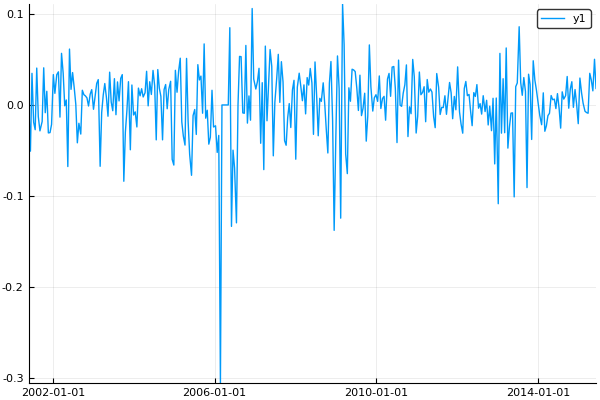

In [58]:
plot(x_list[1], res_means[1])

In [59]:
function evolve(x,y,k=1)
    nx=[1.0]
    for i=1:length(x)
        rr = last(nx)*(1+k*y[i])
        push!(nx,rr)
    end
    return (x,nx[2:end])
end

function evolve(y,k=1)
    nx=[1.0]
    for i=1:length(y)
        rr = last(nx)*(1+k*y[i])
        push!(nx,rr)
    end
    return nx
end

ppp=[]
for i=1:6
    t1 = evolve(res_means[i],1)
    thk = evolve(res_means[i],kelly(res_means[i],6)*.5)
    tk = evolve(res_means[i],kelly(res_means[i],6)*1)
    push!(ppp, hcat(t1,thk,tk))
end

In [60]:
ppp=[]
for i=1:6
    t1 = evolve(res_means[i],1)
    thk = evolve(res_means[i],kelly(res_means[i],6)*.5)
    tk = evolve(res_means[i],kelly(res_means[i],6)*1)
    push!(ppp, hcat(t1,thk,tk))
end

In [61]:
ppp[1]

355×3 Array{Float64,2}:
 1.0       1.0       1.0     
 1.00634   1.00402   1.00804 
 0.955279  0.971701  0.943142
 0.988431  0.993096  0.984676
 0.969676  0.98114   0.960967
 0.94334   0.964233  0.927848
 0.981537  0.989005  0.975522
 0.969066  0.981032  0.959794
 0.941495  0.963323  0.925143
 0.924398  0.952224  0.903824
 0.962091  0.976859  0.950589
 0.953926  0.971599  0.940353
 0.968251  0.980856  0.958272
 ⋮                           
 1.37752   1.31026   1.35285 
 1.41821   1.33481   1.40356 
 1.43699   1.34602   1.42714 
 1.43968   1.34763   1.43054 
 1.42973   1.34171   1.41799 
 1.41778   1.3346    1.40295 
 1.40489   1.3269    1.38676 
 1.45369   1.35614   1.44789 
 1.49348   1.3797    1.49818 
 1.5166    1.39324   1.5276  
 1.59264   1.43757   1.6248  
 1.62107   1.45385   1.6616  

In [62]:
my_plot(dup) = plot(dup[1],dup[2])
my_plot(arr::Array) = plot(1:size(arr)[1],arr)

my_plot (generic function with 2 methods)


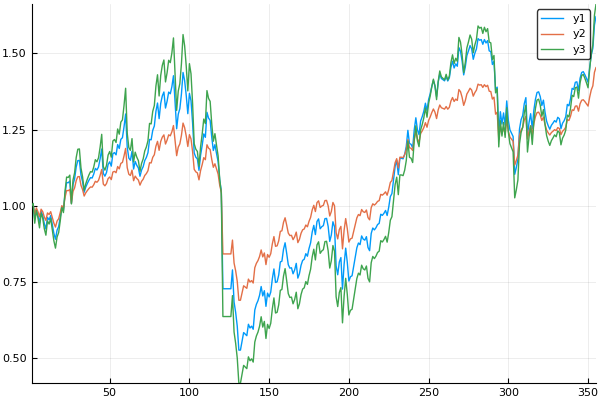

In [63]:
my_plot(ppp[1])


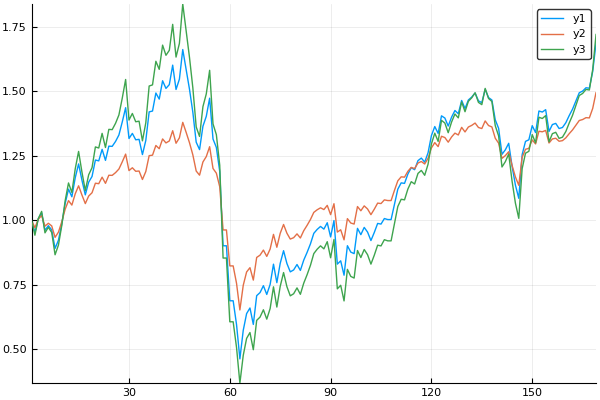

In [64]:
my_plot(ppp[2])


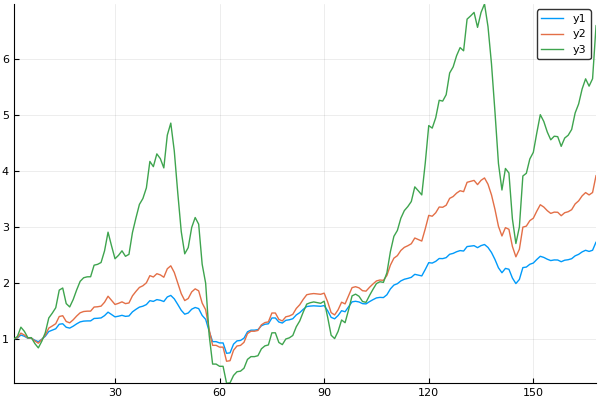

In [65]:
my_plot(ppp[3])


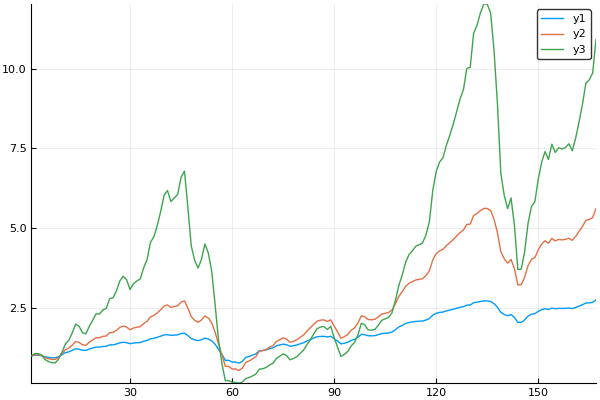

In [66]:
my_plot(ppp[4])


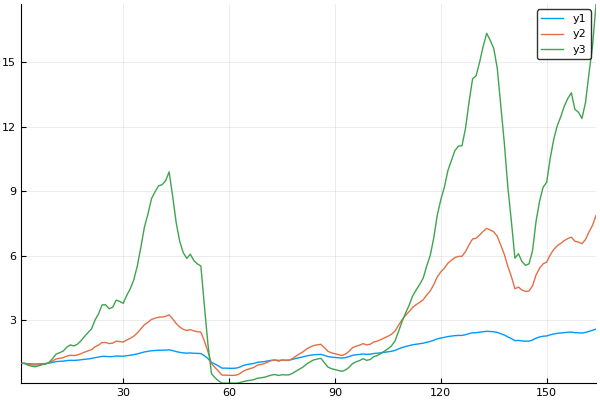

In [67]:
my_plot(ppp[5])


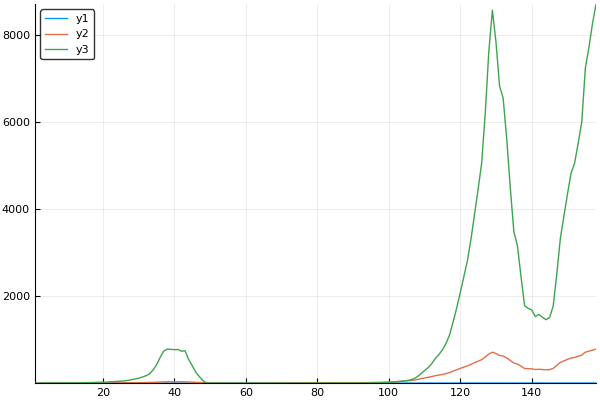

In [68]:
my_plot(ppp[6])